In [3]:
import pickle
from root_pandas import read_root
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rc('figure', facecolor='w', figsize=(10,10))
plt.rc('axes', labelsize=24)
plt.rc('axes', titlesize=24)

In [4]:
runs = ['B', 'C', 'D', 'E', 'F', 'G', 'H']
df_mu_bg_list = []
df_ele_bg_list = []
for run in runs:
    df_mu_bg_list.append(read_root('../data/step3_vbf_bdt/output_mumug_2016_flat.root', 'muon_2016'+run))
    df_ele_bg_list.append(read_root('../data/step3_vbf_bdt/output_elelg_2016_flat.root', 'electron_2016'+run))
df_mu_gluglu = read_root('../data/step3_vbf_bdt/output_mumug_2016_flat.root', 'hzg_gluglu').astype('float')
df_mu_vbf = read_root('../data/step3_vbf_bdt/output_mumug_2016_flat.root', 'hzg_vbf').astype('float')
df_mu_bg = pd.concat(df_mu_bg_list).astype('float')
df_ele_gluglu = read_root('../data/step3_vbf_bdt/output_elelg_2016_flat.root', 'hzg_gluglu').astype('float')
df_ele_vbf = read_root('../data/step3_vbf_bdt/output_elelg_2016_flat.root', 'hzg_vbf').astype('float')
df_ele_bg = pd.concat(df_ele_bg_list).astype('float')

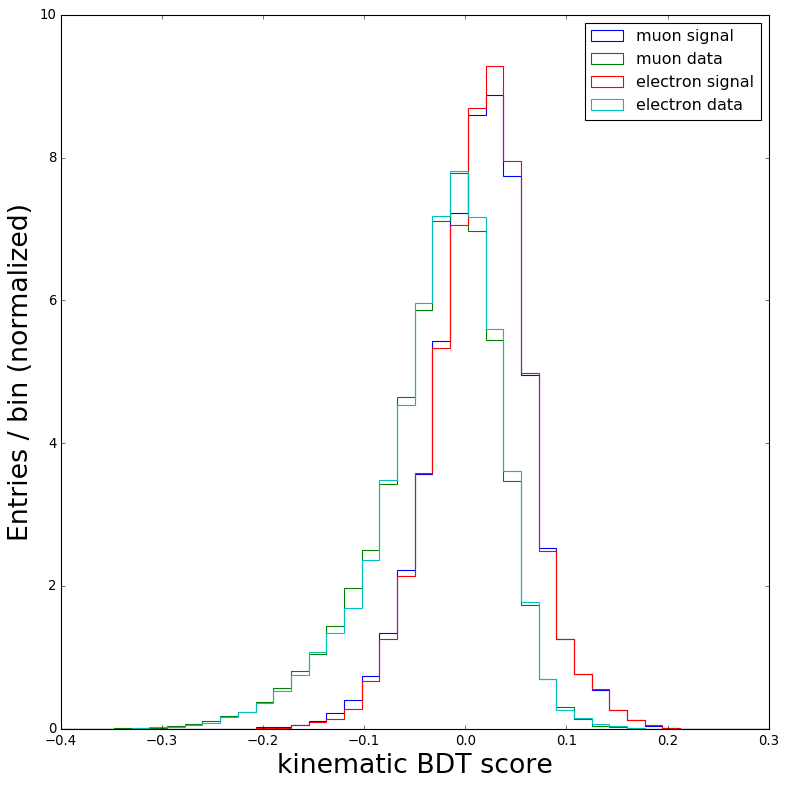

In [18]:
#cuts = 'not isLeptonTag and vbf_bdt < -0.01'
cuts = 'isLeptonTag != 1. and vbf_bdt < -0.01'
fig, ax = plt.subplots()
ax.hist(df_mu_gluglu.query(cuts).kin_bdt, bins=40, range=[-0.4, 0.3], histtype='step', density=True, label='muon signal');
ax.hist(df_mu_bg.query(cuts).kin_bdt, bins=40, range=[-0.4, 0.3], histtype='step', density=True, label='muon data');
ax.hist(df_ele_gluglu.query(cuts).kin_bdt, bins=40, range=[-0.4, 0.3], histtype='step', density=True, label='electron signal');
ax.hist(df_ele_bg.query(cuts).kin_bdt, bins=40, range=[-0.4, 0.3], histtype='step', density=True, label='electron data');
ax.set_xlabel('kinematic BDT score');
ax.set_ylabel('Entries / bin (normalized)');
ax.legend();
plt.tight_layout()
plt.savefig('kinematic_bdt_output_vbf_removed.png', dpi=500)

NameError: name 'df_mu_sig' is not defined

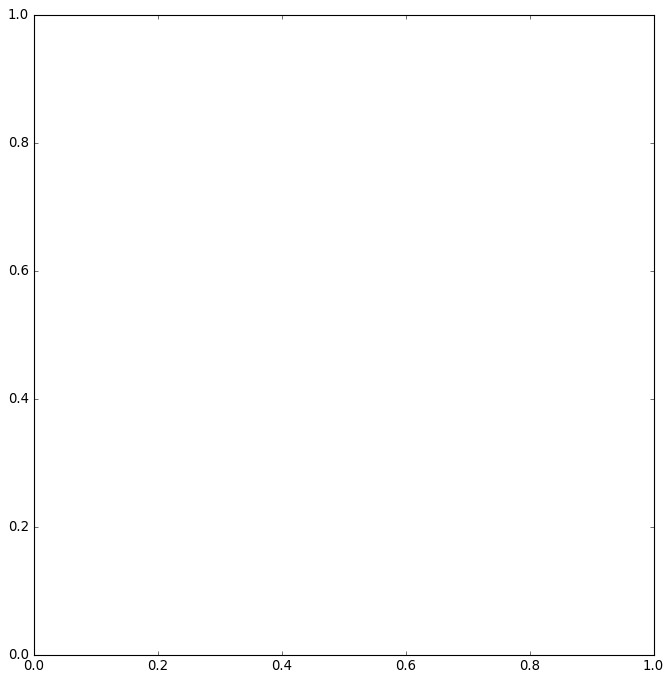

In [10]:
varToPlot = 'dijetM'
fig, ax = plt.subplots()
ax.hist(df_mu_sig[varToPlot], bins=40, histtype='step', density=True, label='muon signal');
ax.hist(df_mu_bg[varToPlot], bins=40, histtype='step', density=True, label='muon data');
ax.hist(df_ele_sig[varToPlot], bins=40, histtype='step', density=True, label='electron signal');
ax.hist(df_ele_bg[varToPlot], bins=40, histtype='step', density=True, label='electron data');
#ax.set_xlabel('kinematic BDT score');
ax.set_ylabel('Entries / bin (normalized)');
ax.legend();
plt.tight_layout()
#plt.savefig('kinematic_bdt_output.png', dpi=500)

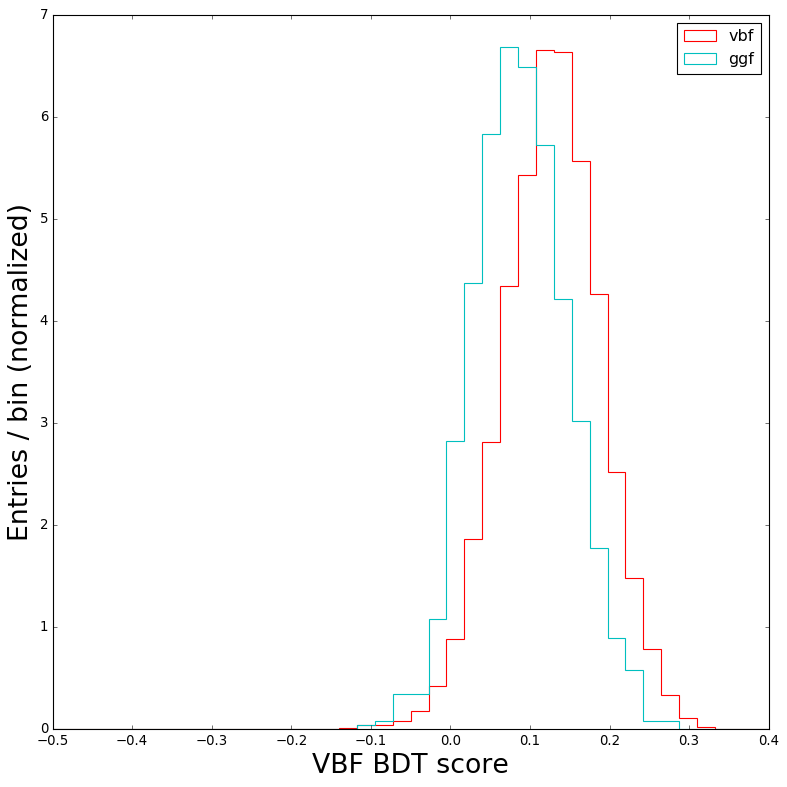

In [6]:
df_vbf = pd.concat([df_mu_vbf, df_ele_vbf])
df_gluglu = pd.concat([df_mu_gluglu, df_ele_gluglu])
#df_zjets_mu = read_root('data/step3_vbf_bdt/output_mumug_2016_flat.root', 'zjets_m-50_amc').query('not vetoDY')
#df_zjets_ele = read_root('data/step3_vbf_bdt/output_elelg_2016_flat.root', 'zjets_m-50_amc').query('not vetoDY')
#df_zjets = pd.concat([df_zjets_mu, df_zjets_ele])
#df_zg_mu = read_root('data/step3_vbf_bdt/output_mumug_2016_flat.root', 'zg_llg')
#df_zg_ele = read_root('data/step3_vbf_bdt/output_elelg_2016_flat.root', 'zg_llg')
#df_zg = pd.concat([df_zg_mu, df_zg_ele])
cuts = 'isDijetTag == 1.'
fig, ax = plt.subplots()
ax.hist(df_vbf.query(cuts).vbf_bdt, bins=40, range=[-0.5, 0.4], histtype='step', density=True, label='vbf', color='r');
ax.hist(df_gluglu.query(cuts).vbf_bdt, bins=40, range=[-0.5, 0.4], histtype='step', density=True, label='ggf', color='c');
#ax.hist(df_zjets.query(cuts).vbf_bdt, bins=40, range=[-0.5, 0.4], histtype='step', density=True, label='Z+jets', color='g');
#ax.hist(df_zg.query(cuts).vbf_bdt, bins=40, range=[-0.5, 0.4], histtype='step', density=True, label='SM Zg', color='y');
#ax.hist(df_ele_vbf.query(cuts).vbf_bdt, bins=30, range=[-0.2, 0.4], histtype='step', density=True, label='electron vbf');
#ax.hist(df_ele_gluglu.query(cuts).vbf_bdt, bins=30, range=[-0.2, 0.4], histtype='step', density=True, label='electron ggf');
#ax.hist(df_mu_bg.query(cuts).vbf_bdt, bins=40, range=[-0.5, 0.4], histtype='step', density=True, label='muon data');
#ax.hist(df_ele_bg.query(cuts).vbf_bdt, bins=40, range=[-0.5, 0.4], histtype='step', density=True, label='electron data');
ax.set_xlabel('VBF BDT score');
ax.set_ylabel('Entries / bin (normalized)');
ax.legend();
plt.tight_layout()
#plt.savefig('vbf_bdt_output_sig_bg.png', dpi=500)

In [15]:
df_vbf.isDijetTag

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
5        0.0
6        1.0
7        0.0
8        0.0
9        1.0
10       0.0
11       1.0
12       0.0
13       0.0
14       0.0
15       1.0
16       1.0
17       0.0
18       1.0
19       0.0
20       1.0
21       0.0
22       1.0
23       1.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
17312    0.0
17313    0.0
17314    0.0
17315    0.0
17316    0.0
17317    1.0
17318    0.0
17319    1.0
17320    0.0
17321    0.0
17322    0.0
17323    0.0
17324    0.0
17325    1.0
17326    0.0
17327    0.0
17328    0.0
17329    0.0
17330    0.0
17331    0.0
17332    0.0
17333    1.0
17334    0.0
17335    0.0
17336    0.0
17337    0.0
17338    1.0
17339    0.0
17340    0.0
17341    0.0
Name: isDijetTag, Length: 39681, dtype: float64

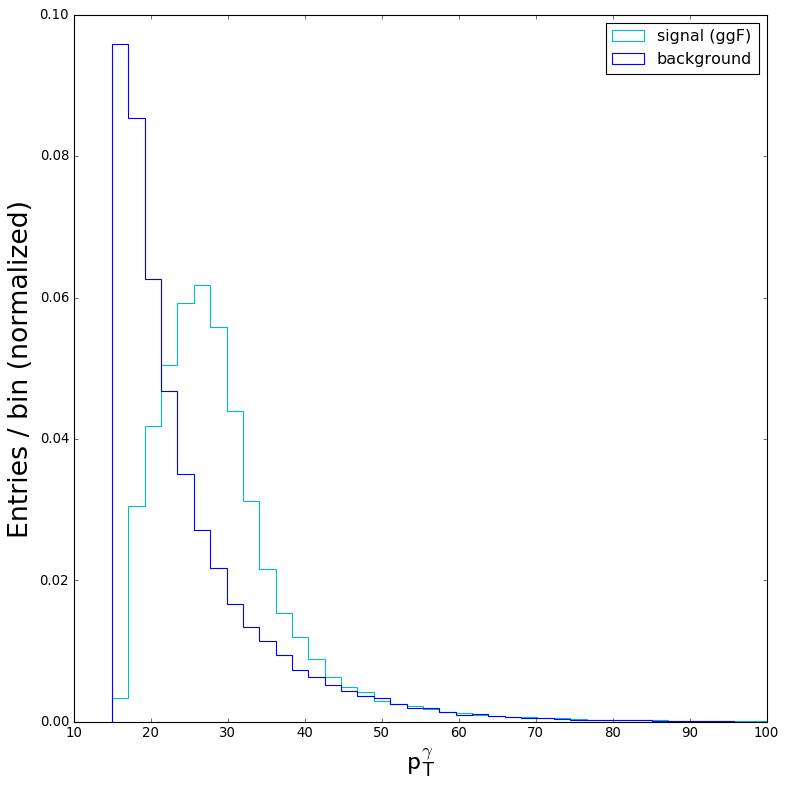

In [14]:
cuts = 'isDijetTag != 1. and -0.085 < kin_bdt'
fig, ax = plt.subplots()
#ax.hist(df_vbf.query(cuts).photonOnePt, bins=40, range=[10., 100.], histtype='step', density=True, label='vbf', color='r');
ax.hist(df_gluglu.query(cuts).photonOnePt, bins=40, range=[15., 100.], histtype='step', density=True, label='signal (ggF)', color='c');
#ax.hist(df_zjets.query(cuts).photonOnePt, bins=40, range=[10., 100.], histtype='step', density=True, label='Z+jets', color='g');
#ax.hist(df_zg.query(cuts).photonOnePt, bins=40, range=[10., 100.], histtype='step', density=True, label='SM Zg', color='y');
#ax.hist(df_ele_vbf.query(cuts).vbf_bdt, bins=30, range=[-0.2, 0.4], histtype='step', density=True, label='electron vbf');
#ax.hist(df_ele_gluglu.query(cuts).vbf_bdt, bins=30, range=[-0.2, 0.4], histtype='step', density=True, label='electron ggf');
ax.hist(df_mu_bg.query(cuts).photonOnePt, bins=40, range=[15., 100.], histtype='step', density=True, label='background');
#ax.hist(df_ele_bg.query(cuts).vbf_bdt, bins=40, range=[-0.5, 0.4], histtype='step', density=True, label='electron data');
ax.set_xlabel(r'$\sf p_{T}^{\gamma}$');
ax.set_ylabel('Entries / bin (normalized)');
ax.legend();
plt.tight_layout()
plt.savefig('photon_pt_sig_bg.png', dpi=500)